In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import wandb

In [2]:
idle_time_data = pd.read_csv('../../data/final_df_points_18_21_class.csv')

TargetVariable = ['idle_time']
Predictors = ['bike_id', 'lat', 'lng', 'temp', 'rain', 'snow', 'wind_speed', 'humidity', 'dt_start',
              'hex_enc', 'start_min', 'year', 'month', 'day', 'on_station', 'in_zone', 'zone_name_enc']

X = idle_time_data[Predictors].values
y = idle_time_data[TargetVariable].values

PredictorScaler = StandardScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)

#TargetScaler = StandardScaler()
#TargetScalerFit = TargetScaler.fit(y)
#y = TargetScalerFit.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2289447, 17)
(2289447, 1)
(254383, 17)
(254383, 1)


In [ ]:
from numpy import sqrt


def eval_regression(y_test,y_pred):
    # Metrics
    # r2, mae, mse, rmse
    r2 = r2_score(y_test, y_pred.ravel())
    mae = mean_absolute_error(y_test, y_pred.ravel())
    mse = mean_squared_error(y_test, y_pred.ravel())
    rmse = sqrt(mse)

    print('r2: %f' % r2)
    print('mae: %f' % mae)
    print('mse: %f' % mse)
    print('rmse: %f' % rmse)

    return r2, mse, rmse, mae

wandb: Currently logged in as: jonathanweske (use `wandb login --relogin` to force relogin)


MLP: 0.364441 (0.176761)



Std,▁
r2_score,▁
Model,MLP
Std,0.17676
r2_score,0.36444


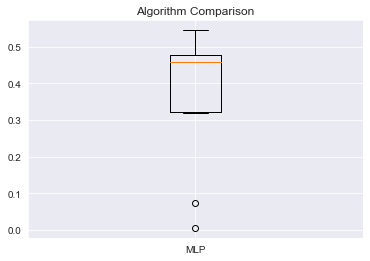

In [4]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 100)))
models.append(('GTB', GradientBoostingRegressor()))

models.append(('MLP', MLPRegressor(hidden_layer_sizes=(128,64))))
models.append(('SGD', SGDRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:

    run = wandb.init(reinit=True,project='Compare-Algorithms')

    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)

    r2, mse, rmse, mae =eval_regression(y_test, y_pred)

    wandb.log({"R2_Score": r2, "MSE": mse, "RMSE": rmse, "MAE" : mae, "Modell": name})

    run.finish()

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()